<a href="https://colab.research.google.com/github/Mizuki-OHASHI/notebooks/blob/main/%E6%8B%A1%E6%95%A3%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [142]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 73.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6c8a1d33409fe52fe429369a0af87ddb8141041c26c8da35d9fdd3a411b1c183
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [143]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

%matplotlib inline

## B2.1 拡散モデルの原理

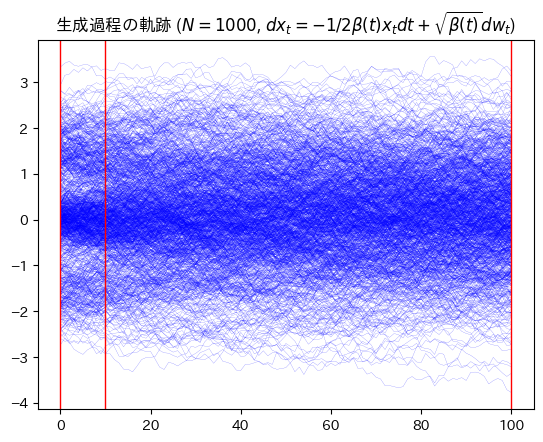

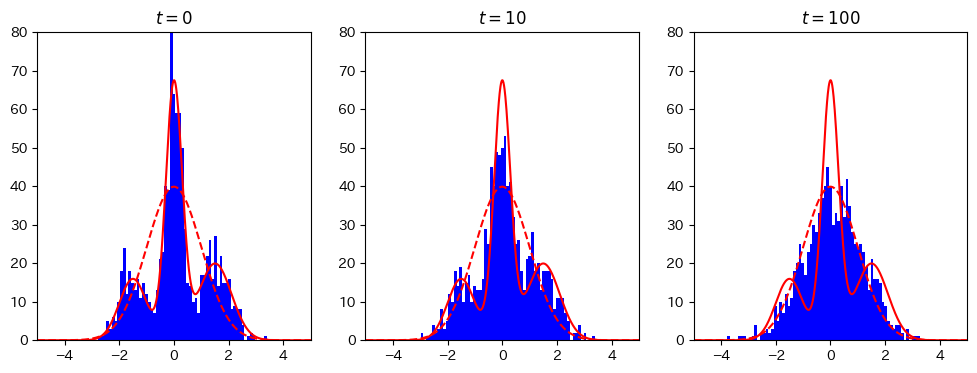

In [171]:
def gauss_dist(mu, sigma):
    return lambda x: 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def test_dist(x, params):
    return sum([p[0] * gauss_dist(p[1], p[2])(x) for p in params])

def test_sample(params):
    r = np.random.random()
    p_sum = 0
    for p in params:
        p_sum += p[0]
        if r < p_sum:
            return np.random.randn() * p[2] + p[1]

dt = 1
T = 101
N = 1000
beta = lambda t: 0.01
f = lambda t, x: - 1/2 * beta(t) * x
g = lambda t: np.sqrt(beta(t))
dw = np.random.randn(T, N)
params = [[0.2, -1.5, 0.5], [0.5, 0, 0.3], [0.3, 1.5, 0.6]]

x_ini = np.array([test_sample(params) for _ in range(N)])
t_list = [0, T//10, T-1]

X = np.zeros((T, N))
X[0] = x_ini
for t in range(1, T):
    X[t] = X[t - 1] + f(t, X[t - 1]) * 1 + g(t) * dw[t]
plt.plot(X, "-b", lw=0.1)
for t in t_list:
    plt.axvline(t, color="r", lw=1)
plt.title("生成過程の軌跡 ($N = " + str(N) + "$, " + "$dx_t = - 1/2 \\beta (t) x_t dt + \\sqrt{\\beta (t)} dw_t$)")
# plt.savefig("/content/drive/MyDrive/Colab Notebooks/figures/拡散モデル_生成過程の軌跡.pdf")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):
    x = X[t_list[i]]
    bins = np.linspace(-5, 5, N//10)
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 80)
    ax.hist(x, bins=bins, color="b")
    ax.plot(np.linspace(-5, 5, 1000),  100 * test_dist(np.linspace(-5, 5, 1000), params), "r-")
    ax.plot(np.linspace(-5, 5, 1000), 100 * gauss_dist(0, 1)(np.linspace(-5, 5, 1000)), "r--")
    ax.set_title("$t = " + str(t_list[i]) + "$")
# plt.savefig("/content/drive/MyDrive/Colab Notebooks/figures/拡散モデル_ヒストグラム.pdf")
plt.show()